In [1]:
%pip install Scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\User\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd

nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv', on_bad_lines='skip')
nyc.columns=['Date','Temperature','Anomaly']

nyc.Date=nyc.Date.floordiv(100)

X_train,X_test,y_train,y_test=train_test_split(
    nyc.Date.values.reshape(-1,1),nyc.Temperature.values, random_state=11
)
print(X_train.shape)
print(X_test.shape)

(93, 1)
(31, 1)


In [6]:
from sklearn.linear_model import LinearRegression

linear_regression=LinearRegression()

linear_regression.fit(X=X_train,y=y_train)

LinearRegression()

In [7]:
linear_regression.coef_

array([0.01701045])

In [8]:
linear_regression.intercept_

-2.6604063268055285

In [9]:
predicted = linear_regression.predict(X_test)

expected = y_test

for p, e in zip(predicted[::5],expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 30.82, expected: 28.94
predicted: 31.55, expected: 29.71
predicted: 30.07, expected: 26.26
predicted: 30.29, expected: 24.84
predicted: 30.99, expected: 25.86
predicted: 30.63, expected: 27.07
predicted: 30.02, expected: 34.36


In [10]:
predict=lambda x:linear_regression.coef_*x + linear_regression.intercept_

print(predict(2019))

print(predict(1890))

[31.68369771]
[29.48934931]


Візуалізація набору даних з регресійній прямий

(10.0, 70.0)

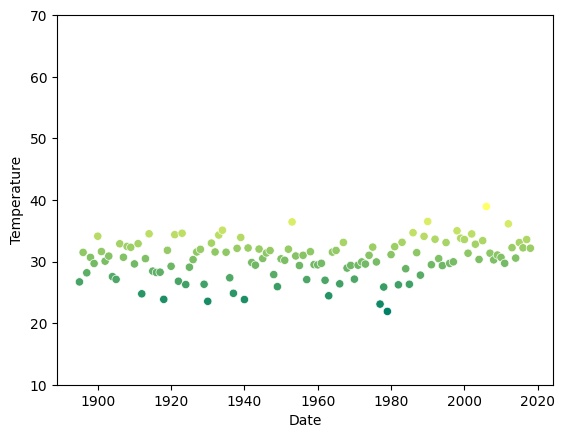

In [11]:
import seaborn as sns

axes = sns.scatterplot(data = nyc, x = 'Date', y = 'Temperature',
                       hue= 'Temperature', palette='summer',legend=False)
axes.set_ylim(10,70)

In [12]:
import numpy as np

x=np.array([min(nyc.Date.values),max(nyc.Date.values)])
y=predict(x)

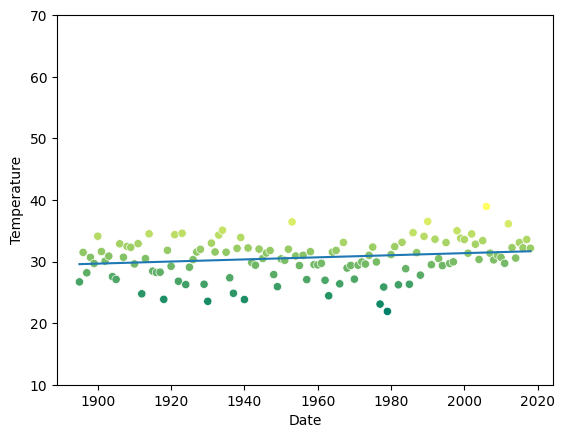

In [13]:
import matplotlib.pyplot as plt

axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
                       hue='Temperature', palette='summer',legend=False)

axes.set_ylim(10, 70)
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)
line = plt.plot(x, y)
plt.show()
